In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [23]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, size=10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, size=10)

In [24]:
x_data

array([ 1.38697777, -0.24020781,  1.00176796,  3.43452102,  4.73982706,
        6.47787975,  7.24208168,  7.74195158,  8.9503953 , 10.31285055])

In [25]:
y_label

array([ 0.7225032 ,  0.04322427,  1.74831109,  4.33749983,  3.36998021,
        6.46200875,  7.07102772,  7.31967509,  7.56686509, 11.3802887 ])

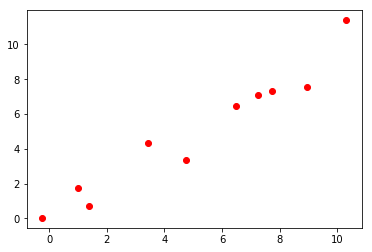

In [26]:
plt.scatter(x_data,y_label, c='red')

# Creating the Neural Network Graph

In [27]:
# y = mx + c

m = tf.Variable(np.random.rand())
c = tf.Variable(np.random.rand())

In [28]:
x = tf.placeholder(tf.float32)

In [29]:
z = tf.multiply(x,m)
y = z + c

In [30]:
y_true = tf.placeholder(tf.float32)
# calculating the error function
error = 0
error = tf.reduce_sum(tf.square(y_true - y))

In [31]:
# adding the optimizer
optimier = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [32]:
train = optimier.minimize(error)

In [33]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 10000
    
    for _ in range(training_steps):
        for i in range(len(x_data)):
            sess.run(train, feed_dict={y_true:y_label[i], x:x_data[i]})
    
    intercept = sess.run(c)
    slope = sess.run(m)

In [37]:
print(intercept)
print(slope)

0.038769603
0.9828354


In [38]:
x_test = np.linspace(0,10,10)
y_pred = x_test*slope + intercept

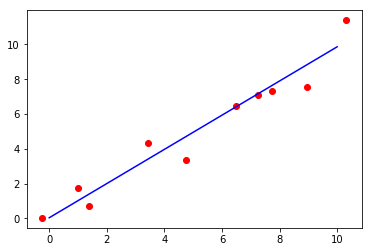

In [40]:
plt.scatter(x_data,y_label, c='red')
plt.plot(x_test, y_pred,c='blue')